<a href="https://colab.research.google.com/github/ykitaguchi77/statistics_for_articles/blob/main/GO_referral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: gdrive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Sheet names: ['A0403_検査結果']


<Figure size 1200x800 with 0 Axes>

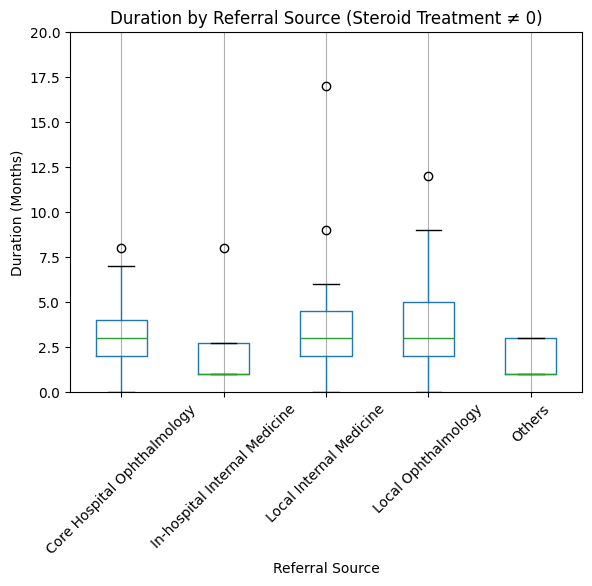

In [3]:
# 必要なライブラリのインストール（Colabでは通常不要ですが、念のため記載）
# !pip install pandas matplotlib openpyxl

import pandas as pd
import matplotlib.pyplot as plt

# アップロードしたファイルのパスを取得
file_path = "/content/drive/MyDrive/発表/アムジェン社内講演20250214/甲状腺眼症ステロイド紹介元.xlsx"

# Excelファイルの読み込み
xls = pd.ExcelFile(file_path)

# シートの確認
sheet_names = xls.sheet_names
print("Sheet names:", sheet_names)

# 検査結果シートを読み込み
df = pd.read_excel(file_path, sheet_name='A0403_検査結果')

# 紹介元コードのマッピング（英語表記）
referral_code_map_en = {
    "0": "Local Internal Medicine",
    "1": "In-hospital Internal Medicine",
    "2": "Local Ophthalmology",
    "3": "Core Hospital Ophthalmology",
    "4": "Our Hospital Ophthalmology",
    "5": "Others"
}

# 紹介元コード列を英語表記に変換
df['Referral Source'] = df[
    "0近隣内科、1院内内科、2近隣眼科、3基幹病院眼科、4当院眼科、5.その他"
].astype(str).map(referral_code_map_en)

# 「いつから（M）」列を数値に変換（無効な値はNaNに）
df['いつから（M）'] = pd.to_numeric(df['いつから（M）'], errors='coerce')

# ステロイド治療列の確認
steroid_columns = [col for col in df.columns if "ステロイド" in col]
if steroid_columns:
    steroid_col = steroid_columns[0]
    # ステロイド治療が0でない症例を抽出
    df_filtered = df[df[steroid_col] != 0]
else:
    print("ステロイド治療の列が見つかりませんでした。全データを使用します。")
    df_filtered = df

# # 箱ひげ図の作成（y軸の最大値を20に設定）
# plt.figure(figsize=(12, 8))
# df_filtered.boxplot(column='いつから（M）', by='Referral Source')
# plt.xlabel('Referral Source')
# plt.ylabel('Duration (Months)')
# plt.title('Duration by Referral Source (Steroid Treatment ≠ 0)')
# plt.ylim(0, 20)
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.suptitle('')  # デフォルトタイトル削除
# plt.show()


# japanize-matplotlibをインストール（初回のみ必要）
!pip install japanize-matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# 日本語が自動的に表示されるようになります
plt.figure(figsize=(12, 8))
df_filtered.boxplot(column='いつから（M）', by='Referral Source')
plt.xlabel('紹介元')
plt.ylabel('経過月数')
plt.title('紹介元別の経過月数（ステロイド治療 ≠ 0）')
plt.ylim(0, 20)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.suptitle('')  # デフォルトタイトル削除
plt.show()
